# Problem 6

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("Data/Quality.csv", header=None).dropna()

X = df[[0, 1]].to_numpy()
y = df[2].to_numpy().astype(np.int32)

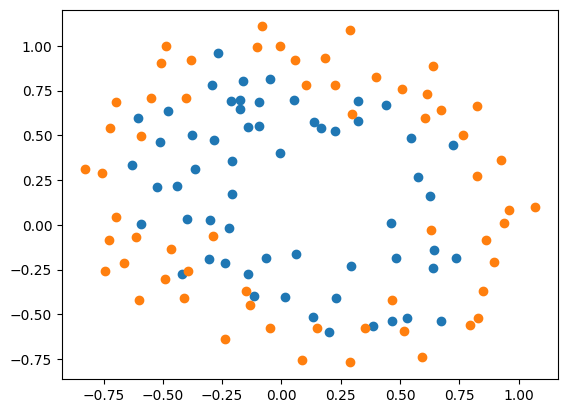

In [3]:
plt.scatter(X.T[0][y==1], X.T[1][y==1])
plt.scatter(X.T[0][y==0], X.T[1][y==0])
plt.show()

### training framework

In [4]:
def increase_dim(Xin):
    fX = [None]*27

    i = 0
    for n in range(1, 7):
        for j in range(n+1):
            fX[i] = (Xin.T[0]**(n-j))*(Xin.T[1]**j)
            i += 1

    fX = np.array(fX).reshape(27, Xin.shape[0]).astype(np.float64).T
    return fX

Normalization and Dimension Increase

In [5]:
X = (X-X.min(axis=0)) / (X.max(axis=0)-X.min(axis=0))
fX = increase_dim(X)

In [6]:
class MyLogisticRegression:

    def __init__(self):
        self.w = None
        self.b = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def gradient(self, X, yp, y, regularization):
        m = X.shape[0]
        dw = np.dot(X.T, (yp - y)) / m
        ## regularization term
        dw += regularization * self.w / m
        db = np.sum(yp - y) / m
        return dw, db

    def fit(self, X, y, epochs=1000, learning_rate=1, regularization=0):

        y = y.reshape(y.shape[0], 1)
        self.w = np.ones((X.shape[1], 1))
        self.b = 0

        for epoch in range(epochs):
            yp = self.sigmoid(np.dot(X, self.w) + self.b)
            dw, db = self.gradient(X, yp, y, regularization)

            self.w -= learning_rate * dw
            self.b -= learning_rate * db

    def predict(self, X):
        proba = self.sigmoid(np.dot(X, self.w) + self.b)
        return np.floor(proba*2).reshape(X.shape[0]).astype(np.int32)

### custom test utils

In [7]:
def calc_confusion_matrix(y, yp, m):
    confusionMatrix = np.zeros((m, m)).astype(np.int32)
    for i in range(len(y)):
        confusionMatrix[y[i], yp[i]] += 1

    return confusionMatrix

In [8]:
def draw_confusion_matrix(matrix):
    green = (30, 200, 40, 160)
    red = (255, 25, 0, 140)

    x = matrix.shape[1]
    y = matrix.shape[0]

    colors = [[green if i==j else red for i in range(x)] for j in range(y)]
    colors = np.array(colors).astype(np.uint8)

    fig, ax = plt.subplots(figsize=(4, 4), dpi=90)
    ax.imshow(colors)

    ax.set_xticks(np.arange(x), labels=range(x))
    ax.set_yticks(np.arange(y), labels=range(y))
    
    ax.set_xticks(np.arange(-.5, x, 1), minor=True)
    ax.set_yticks(np.arange(-.5, y, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
    ax.tick_params(which='minor', bottom=False, left=False)

    ax.set_xlabel("prediction")
    ax.set_ylabel("label")

    for i in range(y):
        for j in range(x):
            text = ax.text(j, i, matrix[i][j], ha="center", va="center", color='black')

    ax.set_title("Confusion Matrix")
    fig.tight_layout()
    plt.show()

In [9]:
def plot_decision_boundary(classifier):
    x1 = np.linspace(0, 1, 100)
    x2 = np.linspace(0, 1, 100)

    X1, X2 = np.meshgrid(x1, x2)
    X1 = np.ravel(X1)
    X2 = np.ravel(X2)
    Xm = np.array([X1, X2]).astype(np.float64).T
    fXm = increase_dim(Xm)

    Z = np.dot(fXm, classifier.w) + classifier.b
    Z = Z.reshape((len(x1), len(x2)))
    
    plt.contour(x1, x2, Z, levels=[0], colors='red')
    plt.scatter(X.T[0][y==1], X.T[1][y==1])
    plt.scatter(X.T[0][y==0], X.T[1][y==0])
    plt.show()

In [10]:
def binaryTestFramework(y, yp):
    cMat = calc_confusion_matrix(y, yp, 2)
    accuracy = cMat.diagonal().sum() / np.sum(cMat)

    tmp = (cMat.sum(axis=0) + cMat.sum(axis=1) - cMat.diagonal())
    jaccardScore = np.average(cMat.diagonal() / tmp)
    
    precision = cMat[1][1] / (cMat[0][1] + cMat[1][1])
    recall = cMat[1][1] / (cMat[1][0] + cMat[1][1])
    f1_score = 2 * precision * recall / (precision + recall)

    print("accuracy  : {:.1f} %".format(accuracy*100))
    print("Jaccard   : {:.1f} %".format(jaccardScore*100))
    print("precision : {:.1f} %".format(precision*100))
    print("recall    : {:.1f} %".format(recall*100))
    print("f1_score  : {:.1f} %".format(f1_score*100))

    return cMat

### training with regularization

In [11]:
classifier = MyLogisticRegression()
classifier.fit(fX, y, 10000, regularization=0.1)
yp = classifier.predict(fX)

In [12]:
cMat = binaryTestFramework(y, yp)

accuracy  : 84.7 %
Jaccard   : 73.5 %
precision : 81.2 %
recall    : 89.7 %
f1_score  : 85.2 %


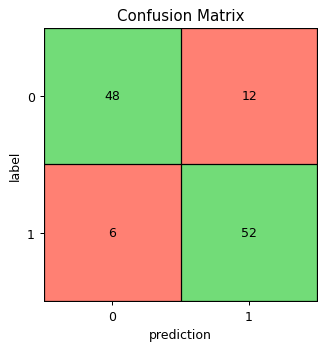

In [13]:
draw_confusion_matrix(cMat)

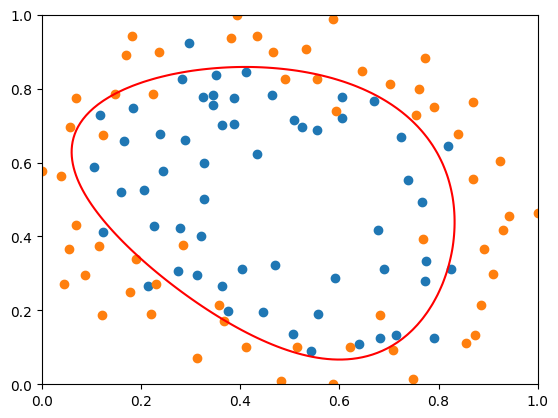

In [14]:
plot_decision_boundary(classifier)

### training without regularization

In [15]:
classifier.fit(fX, y, 10000, regularization=0)
yp = classifier.predict(fX)

In [16]:
cMat = binaryTestFramework(y, yp)

accuracy  : 86.4 %
Jaccard   : 76.1 %
precision : 83.9 %
recall    : 89.7 %
f1_score  : 86.7 %


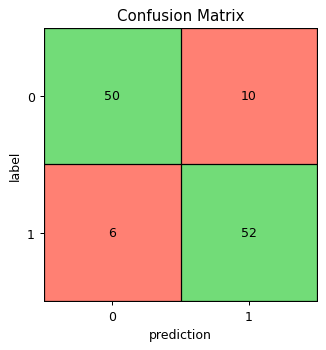

In [17]:
draw_confusion_matrix(cMat)

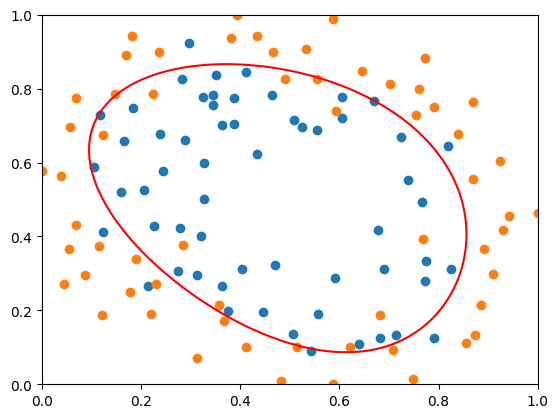

In [18]:
plot_decision_boundary(classifier)